In [23]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
from colors import _get_colors
import numpy as np
import os
import re

In [24]:
folder = ''
files = sorted([f for f in os.listdir() if f.startswith('N-')])
for i, f in enumerate(files):
    print('%2.2d'%i, f)

00 N-02000K-0200p-0_000000a-2_200000_v0.dat
01 N-02000K-0200p-0_000000a-2_200000_v1.dat
02 N-02000K-0200p-0_000000a-2_200000_v2.dat
03 N-02000K-0200p-0_000000a-2_200000_v3.dat
04 N-02000K-0200p-0_000000a-2_200000_v4.dat
05 N-02000K-0200p-0_000000a-2_200000_v5.dat
06 N-02000K-0200p-0_000000a-2_200000_v6.dat
07 N-02000K-0200p-0_000000a-2_200000_v7.dat
08 N-02000K-0200p-0_000000a-2_200000_v8.dat
09 N-02000K-0200p-0_000000a-2_200000_v9.dat
10 N-02000K-0680p-0_000000a-2_200000_v0.dat
11 N-02000K-0680p-0_000000a-2_200000_v1.dat
12 N-02000K-0680p-0_000000a-2_200000_v2.dat
13 N-02000K-0680p-0_000000a-2_200000_v3.dat
14 N-02000K-0680p-0_000000a-2_200000_v4.dat
15 N-02000K-0680p-0_000000a-2_200000_v5.dat
16 N-02000K-0680p-0_000000a-2_200000_v6.dat
17 N-02000K-0680p-0_000000a-2_200000_v7.dat
18 N-02000K-0680p-0_000000a-2_200000_v8.dat
19 N-02000K-0680p-0_000000a-2_200000_v9.dat


In [25]:
rs = []
for f in files:
    data = np.loadtxt(f, skiprows=2, delimiter=',')
    r = data[:,0]
    r = np.sqrt(r)
    rs.append(np.mean(r))
ravg = np.mean(rs)
ravg

0.5140011451221582

In [26]:
file = files[10]
data = np.loadtxt(file, skiprows=2, delimiter=',')
N = int(file[file.find('N-') + 2 : file.find('K-')])
K = int(file[file.find('K-') + 2 : file.find('p-')])
p = re.sub('\.', '_', file[file.find('p-') + 2 : file.find('a-')])
p = int(p)
with open(folder + file, 'r') as f:
    header = f.readline().split(',')
    BURN = int(re.sub(r'[^0-9]', '', header[-2]))
    a = float(re.sub(r'[^0-9\.]', '', header[3]))

In [27]:
r2 = data[:,0]
r = np.sqrt(r2)
psi = data[:,1]
N0 = data[:,2]
N1 = data[:,3]
t = data[:,4]
dt = data[:,5]

In [28]:
size = 18
c = _get_colors(4)
fig = plt.figure(figsize=(size,14))
ax1 = fig.add_subplot(212)
ax2 = fig.add_subplot(211, facecolor=c[0])

ax1.axvline(t[BURN], color='orange', label='Burn In', lw=3, zorder=1000)
ax2.axvline(t[BURN], color='orange', label='Burn In', lw=3, zorder=1000)

ax1.set_xlim(t[0], t[-1])
ax2.set_xlim(t[0], t[-1])
ax2.set_ylim(0, 2000)

ax1.tick_params(labelsize=size*0.8)
ax2.tick_params(labelsize=size*0.8)

ax1.text(0.7, 0.15, '$\\left< r \\right>_t$: %.3f'%np.mean(r[BURN:]), transform=ax1.transAxes, fontsize=size*1.2)

ax1.set_xlabel('time', fontsize=size)
ax1.set_ylabel('$r$', fontsize=size)
ax2.set_xlabel('time', fontsize=size)
ax2.set_title('Temporal Evolution for $\\alpha=0.34$ and $N=2000$', fontsize=size)


ix = t
iy = N0 + N1
verts = [(t[0], 0)] + list(zip(ix, iy)) + [(t[-1], 0)]
poly = Polygon(verts, facecolor=c[1], edgecolor='0.0')
ax2.add_patch(poly)
iy = N0
verts = [(t[0], 0)] + list(zip(ix, iy)) + [(t[-1], 0)]
poly = Polygon(verts, facecolor=c[2], edgecolor='0.0')
ax2.add_patch(poly)

ax1.plot(t, np.sqrt(r2), color=c[3])
ax2.text(0.01, 0.12, '$N^0$', transform=ax2.transAxes, bbox=dict(fc='1.0', alpha=0.8), fontsize=size)
ax2.text(0.01, 0.45, '$N^1$', transform=ax2.transAxes, bbox=dict(fc='1.0', alpha=0.8), fontsize=size)
ax2.text(0.01, 0.85, '$N^2$', transform=ax2.transAxes, bbox=dict(fc='1.0', alpha=0.8), fontsize=size)
#plt.show()
plt.savefig('temporalalpha34.png')

crossings: 10
Measured frequency: 0.0822


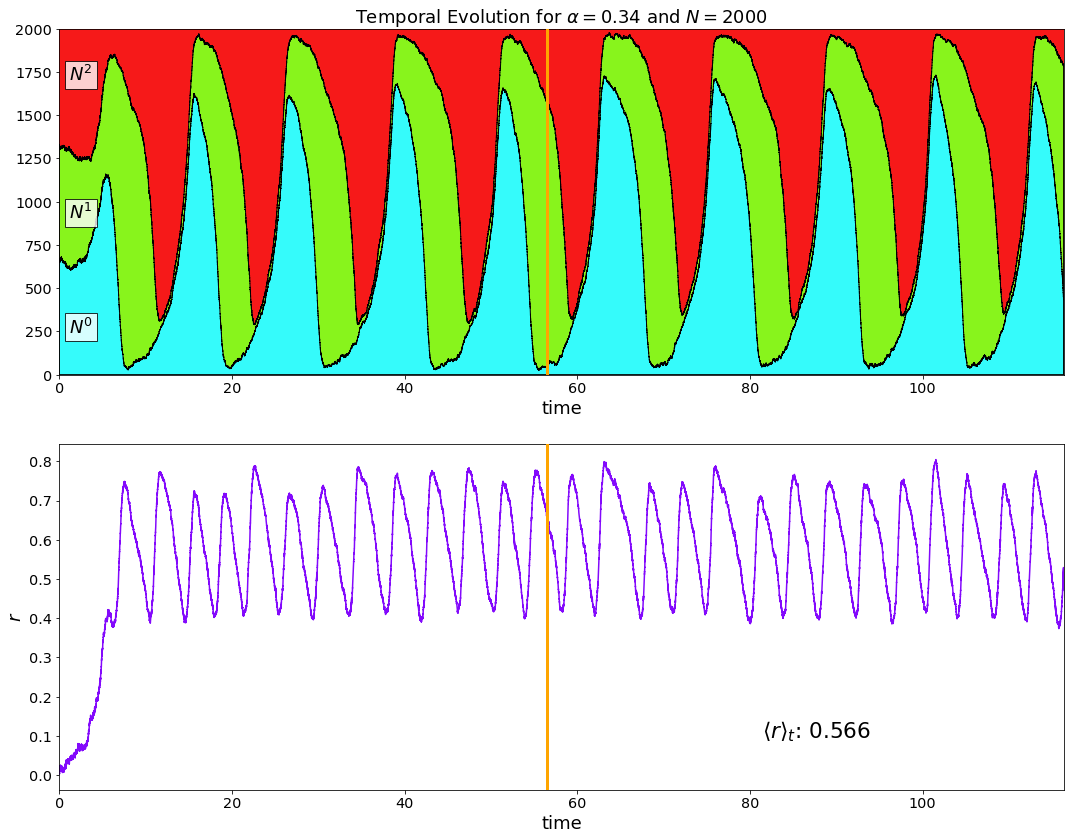

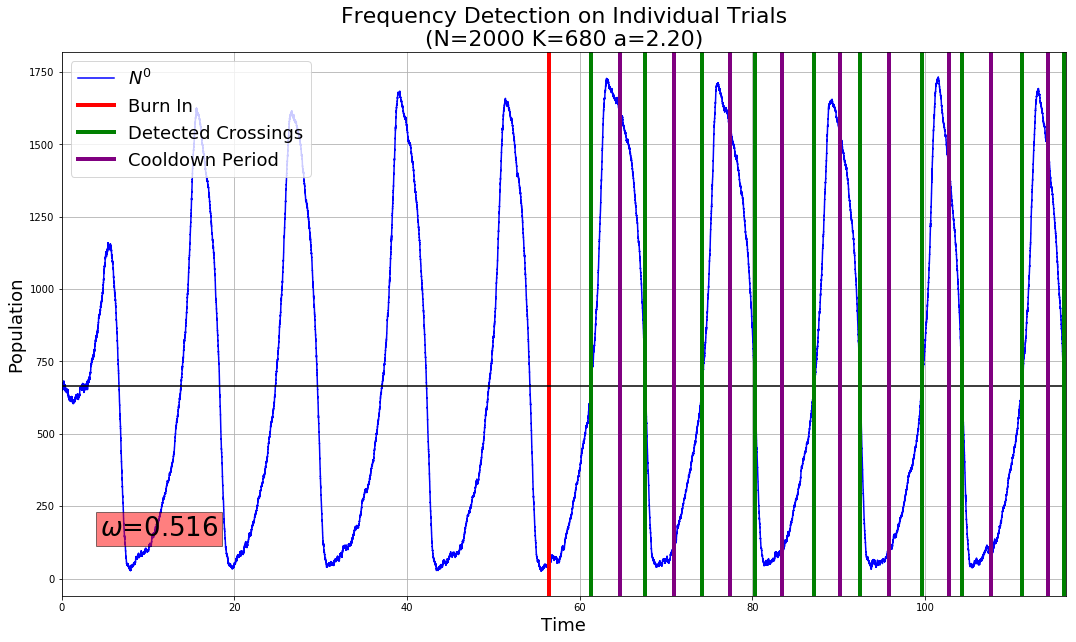

In [29]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

ax.plot(t, N0, label='$N^0$', color='blue')
ax.axvline(t[BURN], lw=4, color='red', label='Burn In')
ax.axhline(N/3, color='k')
ax.set_xlim(0, t[-1])
ax.grid()
ax.set_ylabel('Population', fontsize=18)
ax.set_xlabel('Time', fontsize=18)
ax.set_title('Frequency Detection on Individual Trials\n(N=%d K=%d a=%.2f)'%(N,K,a), fontsize=22)

t_start = 0
t_end = 0
started = False
cooldown = int(N * 2.00)
cd_started = False
crossings = 0
counter = 0
has_label = False

yprev = N0[BURN-1] - N/3
for i in range(BURN, len(t)):
    y = N0[i] - N/3
    if np.sign(yprev) != np.sign(y) and not cd_started:
        if not started:
            t_start = t[i]
            started = True
        t_end = t[i]
        cd_started = True
        crossings += 1
        
        if not has_label:
            has_label = True
            ax.axvline(t[i], color='green', label='Detected Crossings', lw=4)
            ax.axvline(t[i+cooldown], color='purple', label='Cooldown Period', lw=4)
        else:
            ax.axvline(t[i], color='green', lw=4)
            if i+cooldown < len(t):
                ax.axvline(t[i+cooldown], color='purple', lw=4)
    if cd_started:
        counter += 1
    if counter > cooldown:
        cd_started = False
        counter = 0
    yprev = y
    
print('crossings:', crossings)
freq = (crossings - 1) / 2 / (t_end - t_start)
print("Measured frequency: %.4f" % freq)
omega = 2*np.pi*freq

plt.legend(loc='upper left', fontsize=18)
inv = ax.transData.inverted()
plt.text(*inv.transform((200,150)), '$\omega$=%.3f'%omega, bbox=dict(fc='red', alpha=0.5), fontsize=26)
plt.show()
#plt.savefig('foooo.png')